In [51]:
# This is a script to generate nice readable tables for the identified clusters from the merged node dict
# Import libraries
import sys
import glob
import pickle
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.coordinates import Angle

from astropy.io import ascii
from astropy.table import Table

label_size = 34
matplotlib.rc('font', size=label_size) 

import warnings
warnings.filterwarnings("once")

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [2]:
# Define a plotting funciton for plotting specific lists of stars in all relevant spaces
# Old function; use the newer one with axis range adjusted
# def plot_summary_v3(df_vel,df_orb,ind_list,c_list,title,legends,list_mask=False,filename=None,bg=False,ds=True,noise=True,ind_add_cut=[]):
#     if len(ind_add_cut) == 0 and list_mask == True:
#         ind_add_cut = ind_cut
    
#     f = plt.figure(figsize=[30,40])
    
# #     plt.suptitle(title)
    
#     # Set the plotting parameters
#     plt.subplot(4,3,1)
#     plt.xlim([-4.5e3,4.5e3])
#     plt.ylim([-1.7e5,0.1e5])
#     plt.xlabel(r'$L_z$ [kpc km s$^{-1}$]')
#     plt.ylabel(r'$E_{tot}$ [km$^2$ s$^{-2}$]')
    
#     # Make a fake dot for the legend
#     # Adjusted the auto-legend setting to always make stars for clusters and dots for noises
#     for i in range(len(ind_list)):
#         if ((i < len(ind_list)-1 or noise == False) or (len(ind_list) == 1)) and bg == False:  
#             mkr='*'
#             ec='k'
#         else:
#             mkr='.'
#             ec=c_list[i][0]
#         try:
#             # Check if needs downsampling; if so, flag it in legend
#             if len(ind_list[i]) > 5000 and ds == True:
#                 plt.scatter([],[],s=100,alpha=0.8,c=c_list[i][0],label=legends[i]+'_sp',marker=mkr,edgecolors=ec)
#             else:
#                 plt.scatter([],[],s=100,alpha=0.8,c=c_list[i][0],label=legends[i],marker=mkr,edgecolors=ec)
#         except IndexError:
#             print("Cluster number:",legends[i],'has zero stars.')
# #     plt.legend(fontsize='small')
    
#     plt.subplot(4,3,2)
#     plt.xlim([3000,13000])
#     plt.ylim([-5000,5000])
#     plt.xlabel(r'$r_{gal}$ [pc]')
#     plt.ylabel('Z [pc]')
    
#     plt.subplot(4,3,3)
#     plt.xlim([0,26000])
#     plt.ylim([0,26000])
#     plt.xlabel(r'$r_{peri}$ [pc]')
#     plt.ylabel(r'$r_{apo}$ [pc]')
    
#     plt.subplot(4,3,4)
#     plt.xlim([-600,600])
#     plt.ylim([-600,600])
#     plt.xlabel(r'$v_{r}$ [km/s]')
#     plt.ylabel(r'$v_{\phi}$ [km/s]')
    
#     plt.subplot(4,3,5)
#     plt.xlim([-600,600])
#     plt.ylim([-600,600])
#     plt.xlabel(r'$v_{r}$ [km/s]')
#     plt.ylabel(r'$v_{z}$ [km/s]')
    
#     plt.subplot(4,3,6)
#     plt.xlim([0,1])
#     plt.xlabel(r'Ecc [Unitless]')
#     plt.ylabel(r'$f$(Ecc)')
    
#     plt.subplot(4,3,7)
#     plt.xlim([0,1])
#     plt.ylim([1000,5000])
#     plt.xlabel('Ecc [unitless]')
#     plt.ylabel('Zmax [pc]')
    
#     plt.subplot(4,3,8)
#     plt.xlabel(r'$J_{\phi}/J_{tot}$ [kpc km/s]')
#     plt.ylabel(r'$(J_z-J_R)/J_{tot}$ [kpc km/s]')
    
#     plt.subplot(4,3,9)
#     plt.xlim([-3.1,1.0])
#     plt.ylim([-0.21,0.61])
#     plt.xlabel('[Fe/H] [dex]')
#     plt.ylabel(r'[$\alpha$/Fe] [dex]')
    
#     plt.subplot(4,3,10)
#     plt.xlim([0, 9500])
#     plt.ylim([-4500, 4500])
#     plt.xlabel(r'$J_R$ [kpc km/s]')
#     plt.ylabel(r'$J_{\phi}$ [kpc km/s]')
    
#     plt.subplot(4,3,11)
#     plt.xlim([0, 9500])
#     plt.ylim([0, 4500])
#     plt.xlabel(r'$J_R$ [kpc km/s]')
#     plt.ylabel(r'$J_z$ [kpc km/s]')
    
#     plt.subplot(4,3,12)
#     plt.xlim([-3.1,1.0])
#     plt.xlabel(r'[Fe/H] [dex]')
#     plt.ylabel(r'$f$([Fe/H])')
    
#     for i in range(len(ind_list)):
#         if list_mask == True:
#             ind = ind_add_cut[ind_list[i]]
#         else:
#             ind = ind_list[i]
#         color = c_list[i]
        
            
#         if ((i < len(ind_list)-1 or noise == False) or (len(ind_list) == 1)) and bg == False:
#             mkr='*'
#             ms=50
#             al=1 
# #             ec=['k']*len(ind)
#             ec='none'
#             zord=i
#         else:
#             mkr='.'
#             ms=20
#             al=0.3
#             ec='none'
#             zord=-1
        
#         # Determine if there are more than 10000 data points, if so, down-sample it
#         if len(ind) > 5000 and ds == True:
#             ii = np.random.choice(len(ind),int(len(ind)/20),replace=False)
#             ind = ind[ii]
            
#             # Check to see if color list also needs to be downsampled
#             if len(color) > len(ind): 
#                 color = color[ii]
        
#         # Plot E vs. Lz
#         plt.subplot(4,3,1)
#         plt.scatter(df_orb.loc[ind,'Lz'],df_orb.loc[ind,'Etot'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
#         # Plot Z vs. r_gal
#         plt.subplot(4,3,2)
#         plt.scatter(np.sqrt(df_vel.loc[ind,'XGC']**2+df_vel.loc[ind,'YGC']**2),df_vel.loc[ind,'ZGC'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
#         # Plot apo vs. peri
#         plt.subplot(4,3,3)
#         plt.scatter(df_orb.loc[ind,'peri'],df_orb.loc[ind,'apo'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
#         # Plot vphi vs. vr
#         plt.subplot(4,3,4)
#         plt.scatter(df_vel.loc[ind,'vr_g2'],df_vel.loc[ind,'vphi_g2'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
#         # Plot vz vs. vr
#         plt.subplot(4,3,5)
#         plt.scatter(df_vel.loc[ind,'vr_g2'],df_vel.loc[ind,'vz_g2'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
#         # Plot 1d Ecc histogram: skip the noise
#         if ((i < len(ind_list)-1 or noise == False) or (len(ind_list) == 1)):
#             plt.subplot(4,3,6)
# #             plt.hist(df_orb.loc[ind,'ecc'],histtype='step',bins=np.arange(0.0,1.05,0.05),color=color[0])
#             sns.distplot(df_orb.loc[ind,'ecc'],hist=False,kde=True,bins=np.arange(0.0,1.05,0.05),kde_kws={"color": color[0]})
#             # Have to set the x-axis again to overwrite sns auto axis
#             plt.xlabel(r'Ecc [Unitless]')
        
        
#         # Plot zmax vs. ecc
#         plt.subplot(4,3,7)
#         plt.scatter(df_orb.loc[ind,'ecc'],df_orb.loc[ind,'zmax'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
    
#         # Plot Action diamond
#         plt.subplot(4,3,8)
#         plt.scatter(df_orb.loc[ind,'diamond_x'],df_orb.loc[ind,'diamond_y'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
#         # Plot Alpha vs. [Fe/H]
#         plt.subplot(4,3,9)
#         plt.scatter(df_vel.loc[ind,'m_h_ap17'],df_vel.loc[ind,'alpha_m_ap17'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
#         # Plot Jphi vs. JR
#         plt.subplot(4,3,10)
#         plt.scatter(df_orb.loc[ind,'JR'],df_orb.loc[ind,'Jphi'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
#         # Plot Jz vs. JR
#         plt.subplot(4,3,11)
#         plt.scatter(df_orb.loc[ind,'JR'],df_orb.loc[ind,'Jz'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
#         # Plot 1d [Fe/H] histogram; skip the noise
#         if ((i < len(ind_list)-1 or noise == False) or (len(ind_list) == 1)):
#             plt.subplot(4,3,12)
# #             plt.hist(df_vel.loc[ind,'m_h_mean'],histtype='step',bins=np.arange(-3.1,1.1,0.1),color=color[0])
#             sns.distplot(df_vel.loc[ind,'m_h_mean'],hist=False,kde=True,bins=np.arange(-3.1,1.1,0.1),kde_kws={"color": color[0]})
#             plt.xlabel(r'[Fe/H] [dex]')
        
    
#     f.tight_layout()
#     plt.show()
#     if filename != None:
#         f.savefig(filename,layout='tight')

In [90]:
# Define a plotting funciton for plotting specific lists of stars in all relevant spaces
def plot_summary_v3(df_vel,df_orb,ind_list,c_list,title,legends,list_mask=False,filename=None,bg=False,ds=True,noise=True,ind_add_cut=[]):
    if len(ind_add_cut) == 0 and list_mask == True:
        ind_add_cut = ind_cut
    
    f = plt.figure(figsize=[30,40])
    
#     plt.suptitle(title)
    
    # Set the plotting parameters
    plt.subplot(4,3,1)
    plt.xlim([-4.5e3,4.5e3])
    plt.ylim([-1.7e5,0.1e5])
    plt.xlabel(r'$L_z$ [kpc km s$^{-1}$]')
    plt.ylabel(r'$E_{tot}$ [km$^2$ s$^{-2}$]')
    
    # Make a fake dot for the legend
    # Adjusted the auto-legend setting to always make stars for clusters and dots for noises
    for i in range(len(ind_list)):
        if ((i < len(ind_list)-1 or noise == False) or (len(ind_list) == 1)) and bg == False:  
            mkr='*'
            ec='k'
        else:
            mkr='.'
            ec=c_list[i][0]
        try:
            # Check if needs downsampling; if so, flag it in legend
            if len(ind_list[i]) > 5000 and ds == True:
                plt.scatter([],[],s=100,alpha=0.8,c=c_list[i][0],label=legends[i]+'_sp',marker=mkr,edgecolors=ec)
            else:
                plt.scatter([],[],s=100,alpha=0.8,c=c_list[i][0],label=legends[i],marker=mkr,edgecolors=ec)
        except IndexError:
            print("Cluster number:",legends[i],'has zero stars.')
#     plt.legend(fontsize='small')
    
    plt.subplot(4,3,2)
    plt.xlim([3000,13000])
    plt.ylim([-5000,5000])
    plt.xlabel(r'$r_{gal}$ [pc]')
    plt.ylabel('Z [pc]')
    
    plt.subplot(4,3,3)
    plt.xlim([0,16])
    plt.ylim([0,26])
    plt.xlabel(r'$r_{peri}$ [kpc]')
    plt.ylabel(r'$r_{apo}$ [kpc]')
    
    plt.subplot(4,3,4)
    plt.xlim([-600,600])
    plt.ylim([-600,600])
    plt.xlabel(r'$v_{r}$ [km/s]')
    plt.ylabel(r'$v_{\phi}$ [km/s]')
    
    plt.subplot(4,3,5)
    plt.xlim([-600,600])
    plt.ylim([-600,600])
    plt.xlabel(r'$v_{r}$ [km/s]')
    plt.ylabel(r'$v_{z}$ [km/s]')
    
    plt.subplot(4,3,6)
    plt.xlim([0,1])
    plt.xlabel(r'Ecc [Unitless]')
    plt.ylabel(r'$f$(Ecc)')
    
    plt.subplot(4,3,7)
    plt.xlim([0,1])
    plt.ylim([1000,5000])
#     plt.ylim([2500,7800])
    plt.xlabel('Ecc [unitless]')
    plt.ylabel('Zmax [pc]')
    
    plt.subplot(4,3,8)
    plt.xlabel(r'$J_{\phi}/J_{tot}$ [kpc km/s]')
    plt.ylabel(r'$(J_z-J_R)/J_{tot}$ [kpc km/s]')
    
    plt.subplot(4,3,9)
    plt.xlim([-3.1,1.0])
    plt.ylim([-0.21,0.61])
    plt.xlabel('[Fe/H] [dex]')
    plt.ylabel(r'[$\alpha$/Fe] [dex]')
    
    plt.subplot(4,3,10)
    plt.xlim([0, 2500])
    plt.ylim([-3800, 3800])
    plt.xlabel(r'$J_R$ [kpc km/s]')
    plt.ylabel(r'$J_{\phi}$ [kpc km/s]')
    
    plt.subplot(4,3,11)
    plt.xlim([0, 2500])
    plt.ylim([0, 2000])
    plt.xlabel(r'$J_R$ [kpc km/s]')
    plt.ylabel(r'$J_z$ [kpc km/s]')
    
    plt.subplot(4,3,12)
    plt.xlim([-3.1,1.0])
    plt.xlabel(r'[Fe/H] [dex]')
    plt.ylabel(r'$f$([Fe/H])')
    
    for i in range(len(ind_list)):
        if list_mask == True:
            ind = ind_add_cut[ind_list[i]]
        else:
            ind = ind_list[i]
        color = c_list[i]
        
            
        if ((i < len(ind_list)-1 or noise == False) or (len(ind_list) == 1)) and bg == False:
            mkr='*'
            ms=50
            al=1 
#             ec=['k']*len(ind)
            ec='none'
            zord=i
        else:
            mkr='.'
            ms=20
            al=0.3
            ec='none'
            zord=-1
        
        # Determine if there are more than 10000 data points, if so, down-sample it
        if len(ind) > 5000 and ds == True:
            ii = np.random.choice(len(ind),int(len(ind)/20),replace=False)
            ind = ind[ii]
            
            # Check to see if color list also needs to be downsampled
            if len(color) > len(ind): 
                color = color[ii]
        
        # Plot E vs. Lz
        plt.subplot(4,3,1)
        plt.scatter(df_orb.loc[ind,'Lz'],df_orb.loc[ind,'Etot'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        # Plot Z vs. r_gal
        plt.subplot(4,3,2)
        plt.scatter(np.sqrt(df_vel.loc[ind,'XGC']**2+df_vel.loc[ind,'YGC']**2),df_vel.loc[ind,'ZGC'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        # Plot apo vs. peri
        plt.subplot(4,3,3)
        plt.scatter(df_orb.loc[ind,'peri']/1000,df_orb.loc[ind,'apo']/1000,s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
        # Plot vphi vs. vr
        plt.subplot(4,3,4)
        plt.scatter(df_vel.loc[ind,'vr_g2'],df_vel.loc[ind,'vphi_g2'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
        # Plot vz vs. vr
        plt.subplot(4,3,5)
        plt.scatter(df_vel.loc[ind,'vr_g2'],df_vel.loc[ind,'vz_g2'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
        # Plot 1d Ecc histogram: skip the noise
        if ((i < len(ind_list)-1 or noise == False) or (len(ind_list) == 1)):
            plt.subplot(4,3,6)
#             plt.hist(df_orb.loc[ind,'ecc'],histtype='step',bins=np.arange(0.0,1.05,0.05),color=color[0])
            sns.distplot(df_orb.loc[ind,'ecc'],hist=False,kde=True,bins=np.arange(0.0,1.05,0.05),kde_kws={"color": color[0]})
            # Have to set the x-axis again to overwrite sns auto axis
            plt.xlabel(r'Ecc [Unitless]')
        
        
        # Plot zmax vs. ecc
        plt.subplot(4,3,7)
        plt.scatter(df_orb.loc[ind,'ecc'],df_orb.loc[ind,'zmax'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
    
        # Plot Action diamond
        plt.subplot(4,3,8)
        plt.scatter(df_orb.loc[ind,'diamond_x'],df_orb.loc[ind,'diamond_y'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
        # Plot Alpha vs. [Fe/H]
        plt.subplot(4,3,9)
        plt.scatter(df_vel.loc[ind,'m_h_ap17'],df_vel.loc[ind,'alpha_m_ap17'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
        # Plot Jphi vs. JR
        plt.subplot(4,3,10)
        plt.scatter(df_orb.loc[ind,'JR'],df_orb.loc[ind,'Jphi'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
        # Plot Jz vs. JR
        plt.subplot(4,3,11)
        plt.scatter(df_orb.loc[ind,'JR'],df_orb.loc[ind,'Jz'],s=ms,alpha=al,c=color,edgecolors=ec,linewidths=1,marker=mkr,zorder=zord)
        
        
        # Plot 1d [Fe/H] histogram; skip the noise
        if ((i < len(ind_list)-1 or noise == False) or (len(ind_list) == 1)):
            plt.subplot(4,3,12)
#             plt.hist(df_vel.loc[ind,'m_h_mean'],histtype='step',bins=np.arange(-3.1,1.1,0.1),color=color[0])
            sns.distplot(df_vel.loc[ind,'m_h_mean'],hist=False,kde=True,bins=np.arange(-3.1,1.1,0.1),kde_kws={"color": color[0]})
            plt.xlabel(r'[Fe/H] [dex]')
        
    
    f.tight_layout()
    plt.show()
    if filename != None:
        f.savefig(filename,layout='tight')

In [19]:
def get_ind(space, zcut, pcut, clust_id, get_what):
    '''
    Get the index or EDR3 source id for a certain cluster
    with given clustering space, Zmax cut, and presence cut.
    '''
    
    # Confirm the space choice is valid
    if space == 'E_act':
        space_e = 'act_etot'
    elif space == 'vel_cyl':
        space_e = 'vel_cyl'
    else:
        raise ValueError('Space unrecognized. Available options are [E_act, vel_cyl]')
    
    # confirm the zmax cut choice is valid
    if not zcut in ['2500', '3000', '3500']:
        raise ValueError('Zmax cut unrecognized. Available options are [\'2500\', \'3000\', \'3500\']')
    
    # confirm the presence cut choice is valid
    if not pcut in ['0', '10', '20', '30' ,'40', '60', '80']:
        raise ValueError('Presence cut unrecognized. Available options are [\'0\', \'10\', \'20\', \'30\', \'40\', \'60\', \'80\']')
    
    # Set the read in file path
    data_dir = './' + space + '_' + zcut + '_data_20_20_err_nocut/'
    extratext = '_0412_Nstackcut_' + pcut + '_' + space_e + '_hdbscan_min_samples_20_min_clustsize_20_leaf_baseline'
    
    # Read in the id, ind, color, or anything else list from the file
    if get_what == 'id':
        clust_list = np.load(data_dir + 'member_gedr3id' + extratext + '.npy',allow_pickle=True)
    elif get_what == 'ind':
        clust_list = np.load(data_dir + 'member_mask' + extratext + '.npy',allow_pickle=True)
    elif get_what == 'col':
        clust_list = np.load(data_dir + 'color' + extratext + '.npy',allow_pickle=True)
    else:
        raise ValueError('get_what unrecognized. Available options are [\'ind\', \'id\', \'col\']')
    
    # Get the clust we want
    clust_res = clust_list[clust_id]
    
    return clust_res

In [3]:
# Import data
cm_vel_all = pd.read_hdf('../data/dr3_near_vel_plxzp_g2_only.h5')
orb_param_all = pd.read_hdf('../data/dr3_orb_param_err_g2_only.h5')

/opt/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [4]:
# Set all -9999 values in APOGEE and RAVE6 cnn [Fe/H] and alpha to np.nan for easier calculation later
ind_ap_999 = np.where(cm_vel_all.loc[:,'m_h_ap'] < -100)[0]
ind_r6c_999 = np.where(cm_vel_all.loc[:,'m_h_r6c'] < -100)[0]
ind_ap17_999 = np.where(cm_vel_all.loc[:,'m_h_ap17'] < -100)[0]
cm_vel_all.loc[ind_ap_999,'m_h_ap'] = np.nan
cm_vel_all.loc[ind_r6c_999,'m_h_r6c'] = np.nan
cm_vel_all.loc[ind_ap17_999,'m_h_ap17'] = np.nan

ind_ap_999 = np.where(cm_vel_all.loc[:,'m_h_err_ap'] < -100)[0]
ind_ap17_999 = np.where(cm_vel_all.loc[:,'m_h_err_ap17'] < -100)[0]
ind_r6c_999 = np.where(cm_vel_all.loc[:,'m_h_err_r6c'] < -100)[0]
ind_l6s_999 = np.where(cm_vel_all.loc[:,'m_h_err_l6s'] < -100)[0]
cm_vel_all.loc[ind_ap_999,'m_h_err_ap'] = np.nan
cm_vel_all.loc[ind_ap17_999,'m_h_err_ap17'] = np.nan
cm_vel_all.loc[ind_r6c_999,'m_h_err_r6c'] = np.nan
cm_vel_all.loc[ind_l6s_999,'m_h_err_l6s'] = np.nan

ind_ap_999 = np.where(cm_vel_all.loc[:,'alpha_m_ap'] < -100)[0]
ind_ap17_999 = np.where(cm_vel_all.loc[:,'alpha_m_ap17'] < -100)[0]
ind_r6c_999 = np.where(cm_vel_all.loc[:,'alpha_m_r6c'] < -100)[0]
cm_vel_all.loc[ind_ap_999,'alpha_m_ap'] = np.nan
cm_vel_all.loc[ind_ap17_999,'alpha_m_ap17'] = np.nan
cm_vel_all.loc[ind_r6c_999,'alpha_m_r6c'] = np.nan

ind_ap_999 = np.where(cm_vel_all.loc[:,'alpha_m_err_ap'] < -100)[0]
ind_ap17_999 = np.where(cm_vel_all.loc[:,'alpha_m_err_ap17'] < -100)[0]
ind_r6c_999 = np.where(cm_vel_all.loc[:,'alpha_m_err_r6c'] < -100)[0]
ind_l6s_999 = np.where(cm_vel_all.loc[:,'alpha_m_err_l6s'] < -100)[0]
cm_vel_all.loc[ind_ap_999,'alpha_m_err_ap'] = np.nan
cm_vel_all.loc[ind_ap17_999,'alpha_m_err_ap17'] = np.nan
cm_vel_all.loc[ind_r6c_999,'alpha_m_err_r6c'] = np.nan
cm_vel_all.loc[ind_l6s_999,'alpha_m_err_l6s'] = np.nan

<>:13: DeprecationWarning: invalid escape sequence \c


Dataset ap17 has 211798 matches for metallicity.


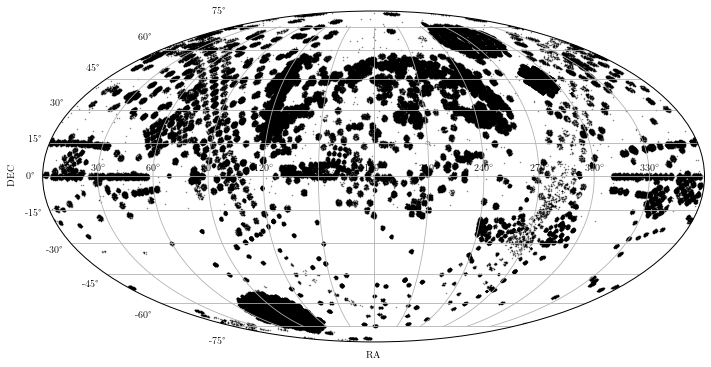

Dataset ap17 has 211788 matches for alpha.
Dataset l6s has 632223 matches for metallicity.


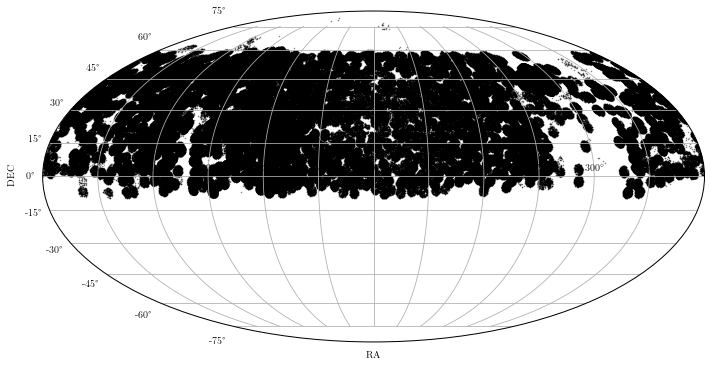

Dataset l6s has 0 matches for alpha.


In [5]:
# Count the number of metallicity matches from each survey
datasets = ['ap17','l6s']
for dataset in datasets:
    ind_tmp = np.where(np.isnan(cm_vel_all.loc[:,f'm_h_{dataset}']) == False)[0]
    N = len(ind_tmp)
    print(f'Dataset {dataset} has {N} matches for metallicity.')
    # Make quick maps of the crossmatch stars
    fig = plt.figure(figsize=[10,8])
    ax = plt.subplot(111, projection="mollweide")
#     ax.scatter(np.radians(cm_vel_all.loc[ind_tmp,'ra'].values-180), np.radians(cm_vel_all.loc[ind_tmp,'dec'].values), marker='.', s=1, alpha=0.5, c='k')
    ax.scatter(np.radians(cm_vel_all.loc[ind_tmp,'ra'].values-180), np.radians(cm_vel_all.loc[ind_tmp,'dec'].values), marker='.', s=1, alpha=0.5, c='k', rasterized=True)
    ax.set_xticks(np.arange(-np.pi*5/6,np.pi*5/6,np.pi/6))
    ax.set_xticklabels(['$'+str(deg)+'^{\circ}$' for deg in np.arange(30,360,30)])
    plt.xlabel('RA')
    plt.ylabel('DEC')
    plt.grid()
    plt.tight_layout()
    plt.show()
    
    fig.savefig(f'./skymap/skymap_crossmatched_stars_{dataset}_rasterized.pdf')
    
    N = len(np.where(np.isnan(cm_vel_all.loc[:,f'alpha_m_{dataset}']) == False)[0])
    print(f'Dataset {dataset} has {N} matches for alpha.')
    


In [5]:
# calculate the columns for the scaled action diamond
orb_param_all['Jtot'] = np.sqrt(orb_param_all['Jphi']**2+orb_param_all['JR']**2+orb_param_all['Jz']**2)
orb_param_all['diamond_x']=orb_param_all['Jphi']/orb_param_all['Jtot']
orb_param_all['diamond_y']=(orb_param_all['Jz']-orb_param_all['JR'])/orb_param_all['Jtot']

# Calculate the error for Jtot and diamond_x/y
orb_param_all['e_Jtot'] = np.sqrt(orb_param_all['Jphi']**2*orb_param_all['e_Jphi']**2+orb_param_all['JR']**2*orb_param_all['e_JR']**2+orb_param_all['Jz']**2*orb_param_all['e_Jz']**2)/orb_param_all['Jtot']
orb_param_all['e_diamond_x']=np.sqrt(orb_param_all['Jtot']**2*orb_param_all['e_Jphi']**2+orb_param_all['e_Jtot']**2*orb_param_all['Jphi']**2)/orb_param_all['Jtot']**2
orb_param_all['e_diamond_y']=np.sqrt(orb_param_all['Jtot']**2*(orb_param_all['e_JR']**2+orb_param_all['e_Jz']**2)+orb_param_all['e_Jtot']**2*(orb_param_all['Jz']-orb_param_all['JR'])**2)/orb_param_all['Jtot']**2

# Calculate L_perp for clustering
orb_param_all['Lperp'] = np.sqrt(orb_param_all['Lx']**2+orb_param_all['Ly']**2)
orb_param_all['e_Lperp'] = np.sqrt(orb_param_all['Lx']**2*orb_param_all['e_Lx']**2+orb_param_all['Ly']**2*orb_param_all['e_Ly']**2)/orb_param_all['Lperp']

# This mean metallicity below is only used in the case when we actually want to cluster in or with a prior cut on metallicity
# To avoid systematic differences between spectroscopic surveys; don't mix metallicities from different surveys
# cm_vel_all['m_h_mean'] = np.nanmean(cm_vel_all[['m_h_ap17','m_h_l6s','m_h_r6c','m_h_gl3']].values, axis=1).T
# cm_vel_all['m_h_mean'], cm_vel_all['e_m_h_mean'] = cm_vel_all['m_h_ap17'], cm_vel_all['m_h_err_ap17'] 
# cm_vel_all['m_h_mean'], cm_vel_all['e_m_h_mean'] = cm_vel_all['m_h_l6s'], cm_vel_all['m_h_err_l6s'] 

In [26]:
# Quickly pull out specific trail result source ids
zcut = '2500'
data_dir = './'+space+'_'+zcut+'_data_20_20_err_nocut/'
pcut = '20'
extratext = '_0412_Nstackcut_' + pcut + '_' + space_e + '_hdbscan_min_samples_20_min_clustsize_20_leaf_baseline'
cluster_id = np.load(data_dir + 'member_gedr3id' + extratext + '.npy',allow_pickle=True)
# print(cluster_id[18])
# pd.DataFrame({'source_id': cluster_id[18]}).to_csv("/Users/xwou/Desktop/ngc104_sourceid.csv", index=False)
ind_tmp = get_ind(space, zcut, pcut, 18, 'ind')
df_tmp = cm_vel_all.loc[ind_tmp,:].merge(orb_param_all.loc[ind_tmp,:],left_index=True,right_index=True)

In [44]:
df_tmp.drop(['index','source_id_y'],axis=1,inplace=True)

In [47]:
df_tmp.rename(columns={"source_id_x": "source_id"},inplace=True)

In [49]:
print(df_tmp.columns)
df_tmp.to_csv("/Users/xwou/Desktop/ngc104_all.csv", index=False)

Index(['source_id', 'ra', 'dec', 'm_h_ap', 'm_h_err_ap', 'm_h_flg_ap',
       'alpha_m_ap', 'alpha_m_err_ap', 'alpha_m_flg_ap', 'm_h_l6s',
       ...
       'e_Jphi', 'e_Jz', 'Jtot', 'diamond_x', 'diamond_y', 'e_Jtot',
       'e_diamond_x', 'e_diamond_y', 'Lperp', 'e_Lperp'],
      dtype='object', length=104)


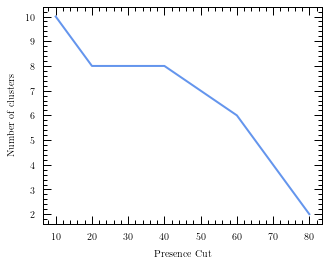

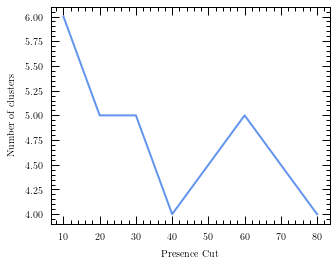

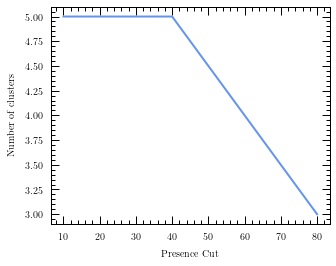

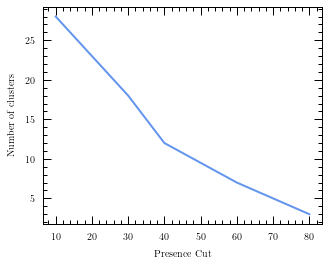

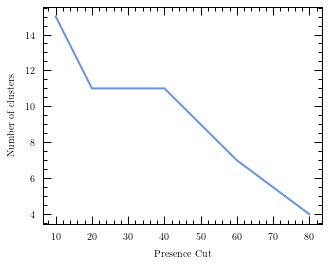

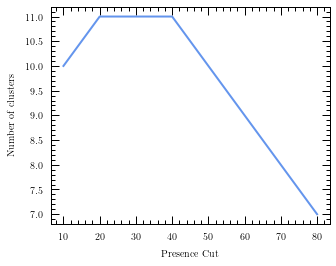

In [11]:
# Make number of clusters as a function of presence cut
for space, space_e in zip(['E_act', 'vel_cyl'], ['act_etot', 'vel_cyl']):
    for zcut in ['2500','3000','3500']:
        data_dir = './'+space+'_'+zcut+'_data_20_20_err_nocut/'
        plot_dir = './'+space+'_'+zcut+'_plot_20_20_err_nocut/'
        N_clust_tmp = []
        for pcut in ['10','20','30','40','60','80']:
            extratext = '_0412_Nstackcut_' + pcut + '_' + space_e + '_hdbscan_min_samples_20_min_clustsize_20_leaf_baseline'
            cluster_id = np.load(data_dir + 'member_gedr3id' + extratext + '.npy',allow_pickle=True)
            N_clust_tmp.append(len(cluster_id)-1)
        f = plt.figure(figsize=[5,4])
        plt.plot([10,20,30,40,60,80],N_clust_tmp)
        plt.xlabel(r'Presence Cut')
        plt.ylabel(r'Number of clusters')
        plt.show()
        f.savefig(plot_dir+space + '_' + zcut + '_N_clust_vs_presence_cut.pdf')

In [155]:
# Import the source_id of the identified clusters
# space = 'E_act'
# space_e = 'act_etot'
space = 'vel_cyl'
space_e = 'vel_cyl'
cut = '2500'
pcut = '20'

feh_from = 'l6s'
# feh_from = 'ap17'

# Use LAMOST or APOGEE for Fe/H
cm_vel_all['m_h_mean'], cm_vel_all['e_m_h_mean'] = cm_vel_all[f'm_h_{feh_from}'], cm_vel_all[f'm_h_err_{feh_from}'] 

data_dir = './node_merging/'
extratext = f'_{space}_zcut_{cut}_pcut_{pcut}_feh'

with open(f'{data_dir}node_merging{extratext}.pkl', 'rb') as f:
    node_dict = pickle.load(f)

In [156]:
# count how many clusters there are after merging
node_merg = []
node_member = []

for cur_node in node_dict.keys():
    if node_dict[cur_node][4] == None:
        if node_dict[cur_node][0] == True:
            node_merg.append(cur_node)
        continue 
    elif node_dict[node_dict[cur_node][4]][0] == False and node_dict[cur_node][0] == True:
        print(cur_node)
        node_merg.append(cur_node)

print("Number of clusters after merging:",len(node_merg))

1907
1909
1913
1917
1919
1920
1931
1935
1945
1946
1942
1912
Number of clusters after merging: 12


In [157]:
# Create a dataframe to hold all the output
N_clust  = len(node_merg)

if space == 'vel_cyl':

    df_output = pd.DataFrame({'Cluster ID': np.arange(N_clust),\
                              'Color': np.zeros(N_clust),\
                              '$v_{R}$': np.zeros(N_clust),\
                              '$\sigma_{v_{R}}$': np.zeros(N_clust),\
                              '$v_{\phi}$': np.zeros(N_clust),\
                              '$\sigma_{v_{\phi}}$': np.zeros(N_clust),\
                              '$v_{z}$': np.zeros(N_clust),\
                              '$\sigma_{v_{z}}$': np.zeros(N_clust)
                             })
elif space == 'E_act':
    df_output = pd.DataFrame({'Cluster ID': np.arange(N_clust),\
                              'Color': np.zeros(N_clust),\
                              '$J_{R}$': np.zeros(N_clust),\
                              '$\sigma_{J_{R}}$': np.zeros(N_clust),\
                              '$J_{\phi}$': np.zeros(N_clust),\
                              '$\sigma_{J_{\phi}}$': np.zeros(N_clust),\
                              '$J_{z}$': np.zeros(N_clust),\
                              '$\sigma_{J_{z}}$': np.zeros(N_clust),\
                              '$E_{tot}$': np.zeros(N_clust),\
                              '$\sigma_{E_{tot}}$': np.zeros(N_clust)
                             })


<>:19: DeprecationWarning: invalid escape sequence \s
<>:20: DeprecationWarning: invalid escape sequence \p


In [115]:
node_dict

{1084: (True,
  'Already a leaf node',
  1,
  array([ 302829,  506306,  557259,  762994,  768364,  784544,  804907,
          825129,  847554, 1139894, 1702170, 1741639, 1809636, 1820723,
         1829595, 1835996, 1844070, 1847398, 1852776, 1870510, 2112343,
         2210824, 2220292, 2225547, 2236378, 2238144, 2249141, 2264239,
         2445210, 2451787, 2476842, 2479708, 2493283, 2508458, 2513562,
         2553216, 2559511, 3300840, 3517601, 3551685, 3605183, 3609950,
         3629673, 3636573, 3660973, 3999840, 4011173, 4039644, 4135896,
         4243475, 4391070, 4483283, 4549626, 4667466, 4738863, 4984266,
         5552509, 5642298, 5645215, 5674186, 5732113, 5746374, 5834350,
         6050515, 6053554]),
  1083,
  [0]),
 1088: (True,
  'Already a leaf node',
  3,
  array([  46316,  332461,  366732,  549338,  562411,  594992,  629372,
          660116,  666180,  738261,  801789,  802282,  809709, 1145047,
         1634781, 1856075, 1927244, 2034095, 2082642, 2211713, 2441560,
   

In [158]:
# Search the corresponding index list
cluster_ind_match = []
for i in range(N_clust):
    source_id_tmp = node_dict[node_merg[i]][3]
    ind_tmp = np.sort(source_id_tmp)
#     ind_tmp = np.array([np.where(cm_vel_all['source_id'] == s_id)[0][0] for s_id in source_id_tmp])
    cluster_ind_match.append(ind_tmp)
    
#     converted_col = [str(element) for element in cluster_col[i][0:3]]
#     df_output.loc[i,'Color'] = ",".join(converted_col)
    
    if space == 'vel_cyl':
    
        df_output.loc[i,'$v_{R}$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'vr_g2'])
        df_output.loc[i,'$\sigma_{v_{R}}$'] = np.nanstd(cm_vel_all.loc[ind_tmp,'vr_g2'])

        df_output.loc[i,'$v_{\phi}$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'vphi_g2'])
        df_output.loc[i,'$\sigma_{v_{\phi}}$'] = np.nanstd(cm_vel_all.loc[ind_tmp,'vphi_g2'])

        df_output.loc[i,'$v_{z}$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'vz_g2'])
        df_output.loc[i,'$\sigma_{v_{z}}$'] = np.nanstd(cm_vel_all.loc[ind_tmp,'vz_g2'])
    
    elif space == 'E_act':
    
        df_output.loc[i,'$J_{R}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'JR'])
        df_output.loc[i,'$\sigma_{J_{R}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'JR'])

        df_output.loc[i,'$J_{\phi}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'Jphi'])
        df_output.loc[i,'$\sigma_{J_{\phi}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'Jphi'])

        df_output.loc[i,'$J_{z}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'Jz'])
        df_output.loc[i,'$\sigma_{J_{z}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'Jz'])

        df_output.loc[i,'$E_{tot}$'] = np.nanmean(orb_param_all.loc[ind_tmp,'Etot'])
        df_output.loc[i,'$\sigma_{E_{tot}}$'] = np.nanstd(orb_param_all.loc[ind_tmp,'Etot'])
    
    # Additional columns as needed
    df_output.loc[i,'$ecc$'] = np.nanmean(orb_param_all.loc[ind_tmp,'ecc'])
    df_output.loc[i,'$[Fe/H]$'] = np.nanmean(cm_vel_all.loc[ind_tmp,'m_h_mean'])
    df_output.loc[i,'$N_{[Fe/H]}$'] = int(len(np.where(np.isnan(cm_vel_all.loc[ind_tmp,'m_h_mean']) == False)[0]))
    
    
    df_output.loc[i,'$N_{star}$'] = int(len(source_id_tmp))
    df_output.loc[i,'Merged Clusters'] = str(np.sort(node_dict[node_merg[i]][5]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:39: RuntimeWarning: Mean of empty slice


In [159]:
# Round the decimals
if space == 'vel_cyl':
    for (col, dp) in zip(['$v_{R}$','$\sigma_{v_{R}}$','$v_{\phi}$','$\sigma_{v_{\phi}}$','$v_{z}$','$\sigma_{v_{z}}$'],[2,2,2,2,2,2]):
        df_output[col] = df_output[col].round(dp)
elif space == 'E_act':
    for (col, dp) in zip(['$J_{R}$','$\sigma_{J_{R}}$','$J_{\phi}$','$\sigma_{J_{\phi}}$','$J_{z}$','$\sigma_{J_{z}}$','$E_{tot}$','$\sigma_{E_{tot}}$'],[2,2,2,2,2,2,2,2]):
        df_output[col] = df_output[col].round(dp)

for (col, dp) in zip(['$ecc$', '$[Fe/H]$'], [2,2]):
    df_output[col] = df_output[col].round(dp)
    
# for (col, dp) in zip(['$N_{[Fe/H]}$', '$N_{star}$'], [0,0]):
#     df_output[col] = df_output[col].round(dp)

df_output = df_output.astype({'$N_{[Fe/H]}$': int, '$N_{star}$': int})
    
# Process the color column
# df_output['Color'] = r'\textcolor[rgb]{' + df_output['Color'] + r'}{$\blacksquare$}'

In [160]:
df_output

,Cluster ID,Color,$v_{R}$,$\sigma_{v_{R}}$,$v_{\phi}$,$\sigma_{v_{\phi}}$,$v_{z}$,$\sigma_{v_{z}}$,$ecc$,$[Fe/H]$,$N_{[Fe/H]}$,$N_{star}$,Merged Clusters
0,0,0.0,-100.93,14.21,291.85,15.01,145.05,16.55,0.53,NaN,0,63,[0]
1,1,0.0,97.72,11.55,-2.75,19.65,-112.26,10.35,0.88,-1.16,9,39,[1]
2,2,0.0,-20.69,35.12,-14.25,11.25,95.97,8.44,0.88,-1.02,19,82,[7 8]
3,3,0.0,110.00,4.39,-171.90,5.72,-95.88,4.74,0.36,-0.61,7,26,[2]
4,4,0.0,-111.46,5.48,-159.53,10.44,-106.72,5.86,0.41,-0.70,11,42,[3]
5,5,0.0,8.88,29.44,-178.41,31.77,-101.21,10.86,0.19,-0.56,75,403,[ 9 11 12 14 15 17 21 22]
6,6,0.0,-24.14,23.20,-225.72,8.45,88.60,15.14,0.13,-0.54,49,251,[10]
7,7,0.0,52.34,5.40,-121.00,5.82,104.60,3.98,0.42,-0.78,8,34,[13]
8,8,0.0,5.53,6.88,-183.34,7.56,51.14,7.83,0.15,-0.30,6,184,[18]
9,9,0.0,-2.20,18.38,-172.21,7.13,103.75,6.53,0.17,-0.59,21,102,[19 20]


In [161]:
clust_all_ind = []
clust_all_col = []

colors = [plt.cm.hsv(each)
          for each in np.linspace(0, 1, N_clust)]

for i in range(N_clust):
    ind_tmp = np.sort(node_dict[node_merg[i]][3])
    col_tmp = list(colors[i])
    clust_all_ind.append(ind_tmp.copy())
    clust_all_col.append(np.array(list(col_tmp.copy())*len(ind_tmp)).reshape((len(ind_tmp),4)))

In [162]:
print(data_dir,extratext)

./node_merging/ _vel_cyl_zcut_2500_pcut_20_feh


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:234: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kde_color != color:
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:162: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to 

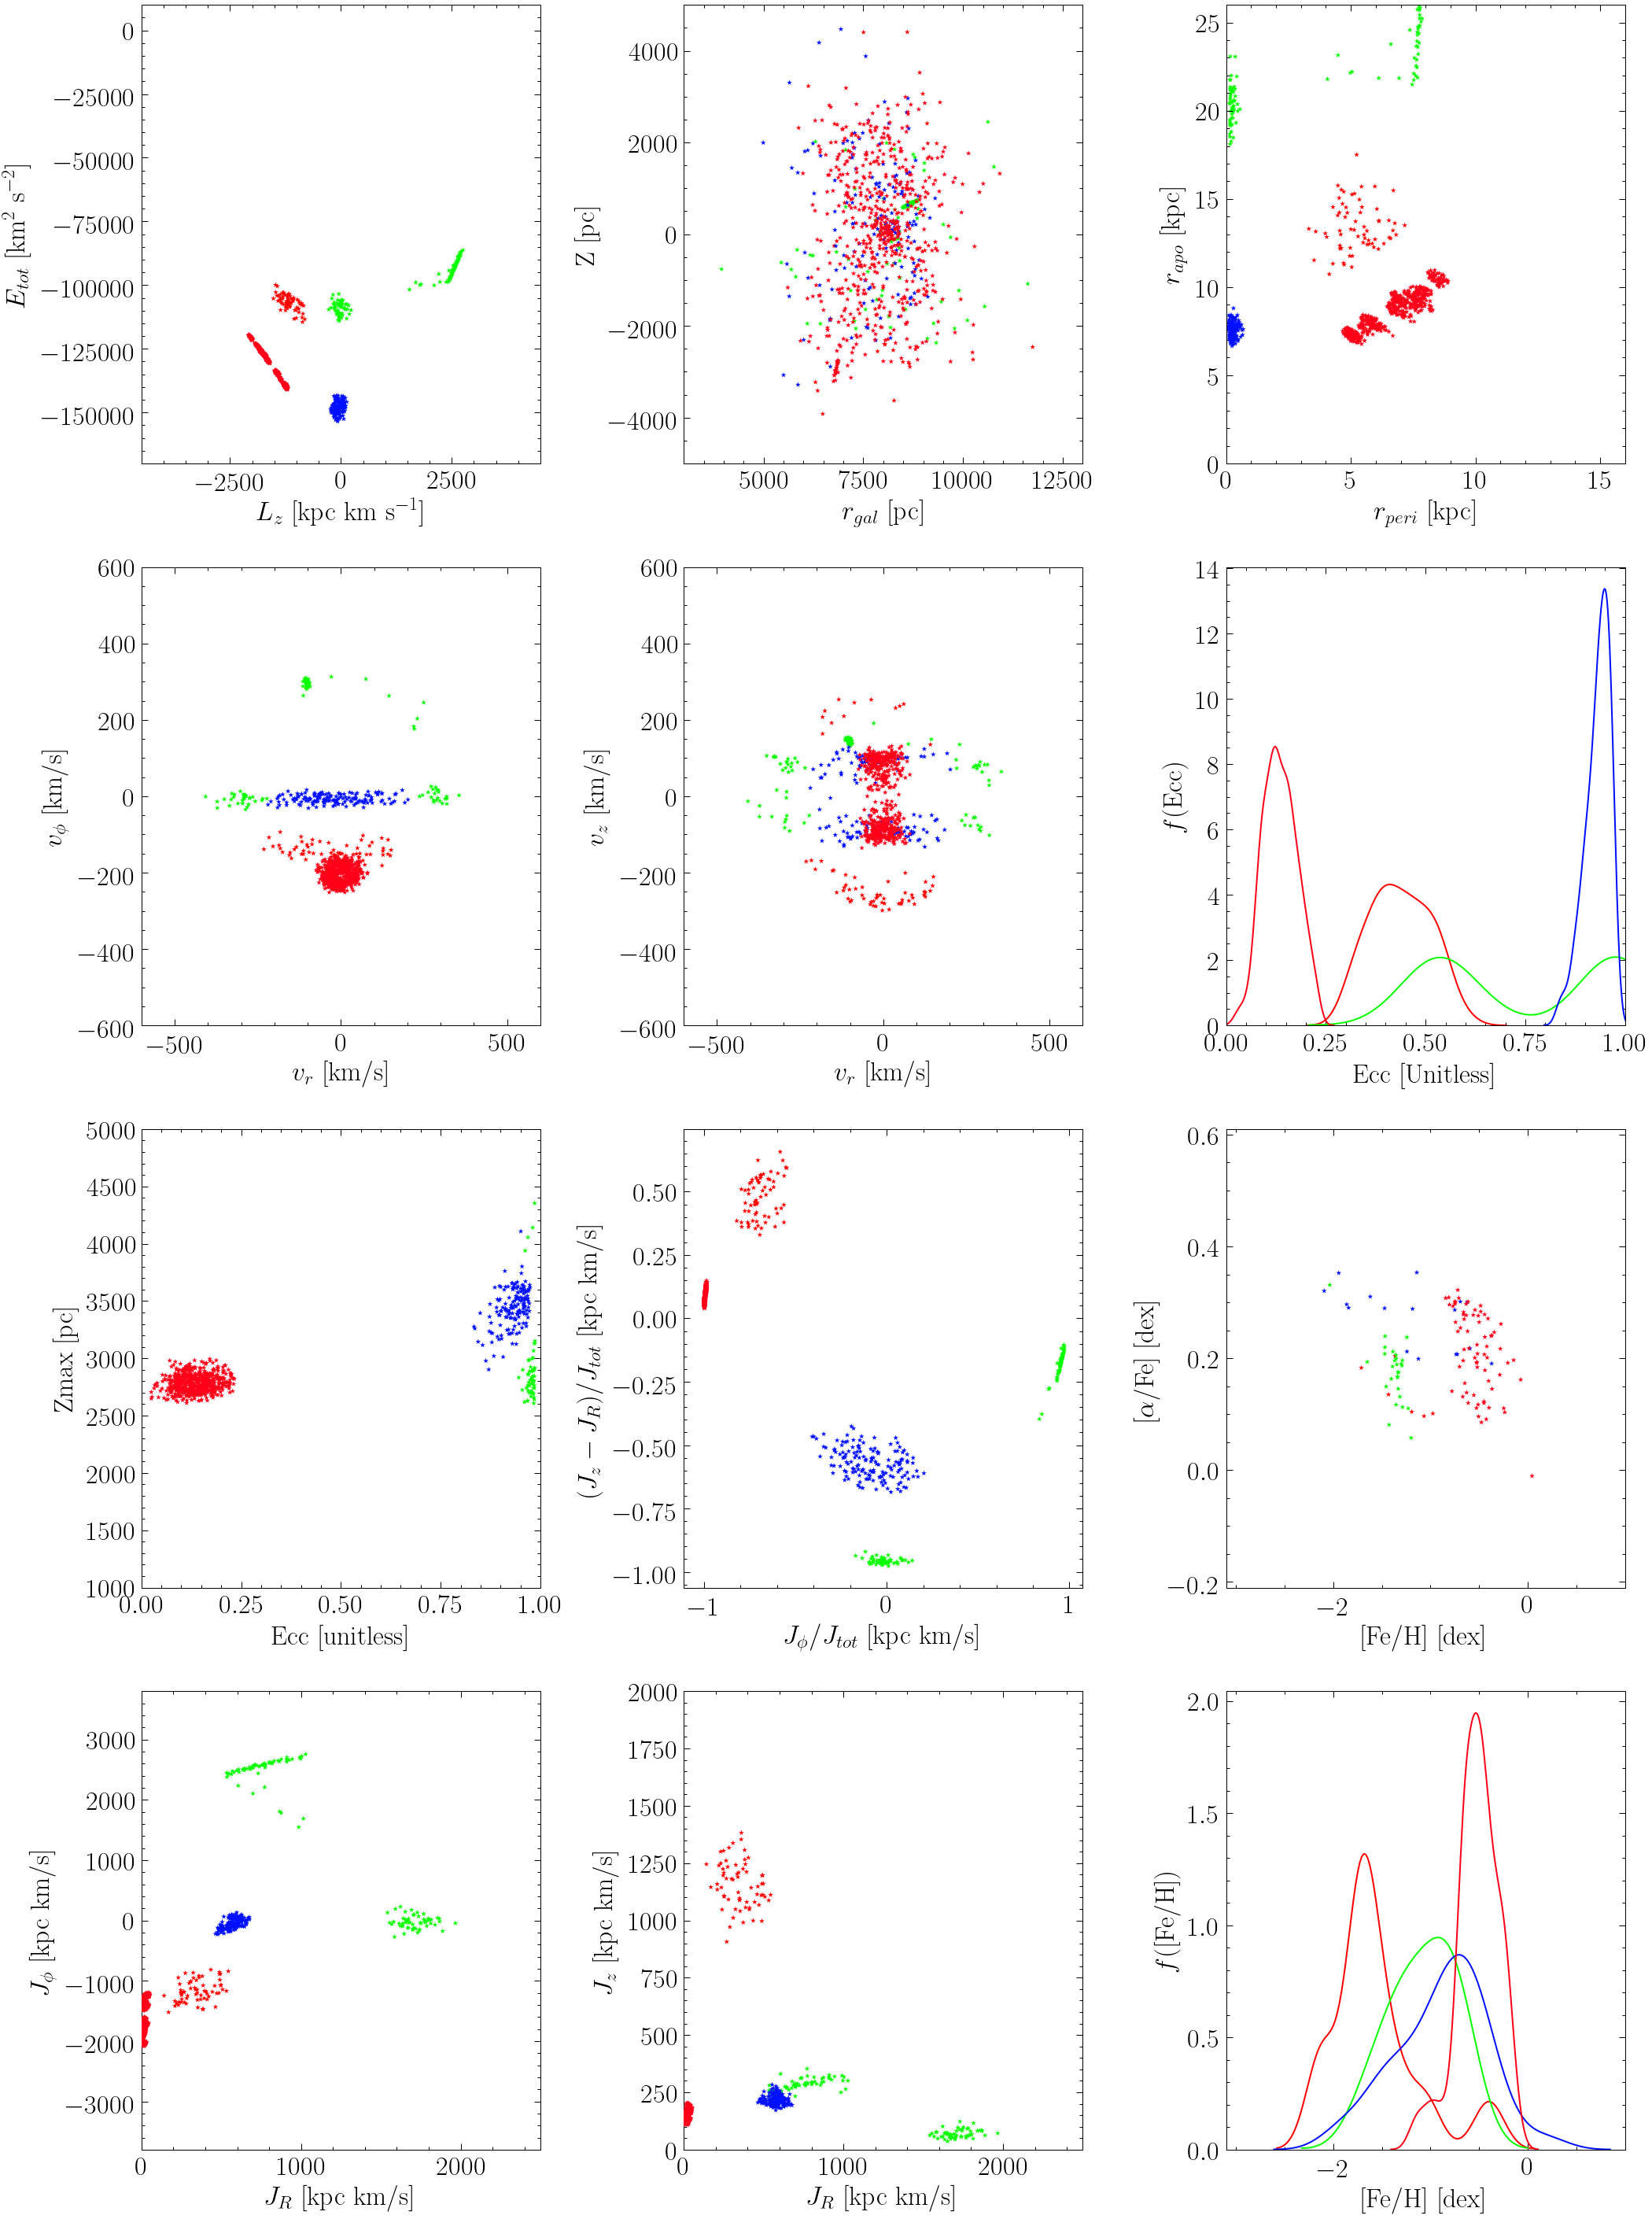

In [73]:
plot_summary_v3(cm_vel_all,orb_param_all,ind_list=clust_all_ind,c_list=clust_all_col,
                title='',legends=['']*len(clust_all_ind),list_mask=False,ind_add_cut=[],ds=False,noise=False,
                filename=f'{data_dir}plot_node_merging{extratext}.pdf')

In [163]:
# add the colors of the merged clusters to the table
for i in range(N_clust):
    # Process the Cluster ID to use Roman numeral
    df_output['Cluster ID'][i] = r'\RN{' + str(df_output['Cluster ID'][i]+1) + r'}'
    
    converted_col = [str(element) for element in colors[i][0:3]]
    df_output.loc[i,'Color'] = ",".join(converted_col)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [164]:
# Process the color column
df_output['Color'] = r'\textcolor[rgb]{' + df_output['Color'] + r'}{$\blacksquare$}'

In [165]:
df_output

,Cluster ID,Color,$v_{R}$,$\sigma_{v_{R}}$,$v_{\phi}$,$\sigma_{v_{\phi}}$,$v_{z}$,$\sigma_{v_{z}}$,$ecc$,$[Fe/H]$,$N_{[Fe/H]}$,$N_{star}$,Merged Clusters
0,\RN{1},"\textcolor[rgb]{1.0,0.0,0.0}{$\blacksquare$}",-100.93,14.21,291.85,15.01,145.05,16.55,0.53,NaN,0,63,[0]
1,\RN{2},"\textcolor[rgb]{1.0,0.532721120956415,0.0}{$\b...",97.72,11.55,-2.75,19.65,-112.26,10.35,0.88,-1.16,9,39,[1]
2,\RN{3},"\textcolor[rgb]{0.93455775808717,1.0,0.0}{$\bl...",-20.69,35.12,-14.25,11.25,95.97,8.44,0.88,-1.02,19,82,[7 8]
3,\RN{4},"\textcolor[rgb]{0.4018366371307548,1.0,0.0}{$\...",110.00,4.39,-171.90,5.72,-95.88,4.74,0.36,-0.61,7,26,[2]
4,\RN{5},"\textcolor[rgb]{0.0,1.0,0.15404569495487538}{$...",-111.46,5.48,-159.53,10.44,-106.72,5.86,0.41,-0.70,11,42,[3]
5,\RN{6},"\textcolor[rgb]{0.0,1.0,0.6867634597860162}{$\...",8.88,29.44,-178.41,31.77,-101.21,10.86,0.19,-0.56,75,403,[ 9 11 12 14 15 17 21 22]
6,\RN{7},"\textcolor[rgb]{0.0,0.7805173926497455,1.0}{$\...",-24.14,23.20,-225.72,8.45,88.60,15.14,0.13,-0.54,49,251,[10]
7,\RN{8},"\textcolor[rgb]{0.0,0.24779627169333063,1.0}{$...",52.34,5.40,-121.00,5.82,104.60,3.98,0.42,-0.78,8,34,[13]
8,\RN{9},"\textcolor[rgb]{0.30808663713075457,0.0,1.0}{$...",5.53,6.88,-183.34,7.56,51.14,7.83,0.15,-0.30,6,184,[18]
9,\RN{10},"\textcolor[rgb]{0.8408077580871701,0.0,1.0}{$\...",-2.20,18.38,-172.21,7.13,103.75,6.53,0.17,-0.59,21,102,[19 20]


In [166]:
t = Table.from_pandas(df_output)

In [167]:
t.columns

<TableColumns names=('Cluster ID','Color','$v_{R}$','$\sigma_{v_{R}}$','$v_{\phi}$','$\sigma_{v_{\phi}}$','$v_{z}$','$\sigma_{v_{z}}$','$ecc$','$[Fe/H]$','$N_{[Fe/H]}$','$N_{star}$','Merged Clusters')>

In [168]:
# Add units to the table
if space == 'vel_cyl':
    for col in ['$v_{R}$','$\sigma_{v_{R}}$','$v_{\phi}$','$\sigma_{v_{\phi}}$','$v_{z}$','$\sigma_{v_{z}}$']:
        t[col] = t[col]*u.km/u.s
elif space == 'E_act':
    for col in ['$J_{R}$','$\sigma_{J_{R}}$','$J_{\phi}$','$\sigma_{J_{\phi}}$','$J_{z}$','$\sigma_{J_{z}}$']:
        t[col] = t[col]*u.kpc*u.km/u.s
    for col in ['$E_{tot}$','$\sigma_{E_{tot}}$']:
        t[col] = t[col]*u.km**2/u.s**2

<>:6: DeprecationWarning: invalid escape sequence \s
<>:6: DeprecationWarning: invalid escape sequence \p


In [169]:
t['$[Fe/H]$'] = t['$[Fe/H]$']*u.dex

In [170]:
t

Cluster ID,Color,$v_{R}$,$\sigma_{v_{R}}$,$v_{\phi}$,$\sigma_{v_{\phi}}$,$v_{z}$,$\sigma_{v_{z}}$,$ecc$,$[Fe/H]$,$N_{[Fe/H]}$,$N_{star}$,Merged Clusters
,,km / s,km / s,km / s,km / s,km / s,km / s,,dex,,,
str7,str60,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,str25
\RN{1},"\textcolor[rgb]{1.0,0.0,0.0}{$\blacksquare$}",-100.93,14.21,291.85,15.01,145.05,16.55,0.53,nan,0,63,[0]
\RN{2},"\textcolor[rgb]{1.0,0.532721120956415,0.0}{$\blacksquare$}",97.72,11.55,-2.75,19.65,-112.26,10.35,0.88,-1.16,9,39,[1]
\RN{3},"\textcolor[rgb]{0.93455775808717,1.0,0.0}{$\blacksquare$}",-20.69,35.12,-14.25,11.25,95.97,8.44,0.88,-1.02,19,82,[7 8]
\RN{4},"\textcolor[rgb]{0.4018366371307548,1.0,0.0}{$\blacksquare$}",110.0,4.39,-171.9,5.72,-95.88,4.74,0.36,-0.61,7,26,[2]
\RN{5},"\textcolor[rgb]{0.0,1.0,0.15404569495487538}{$\blacksquare$}",-111.46,5.48,-159.53,10.44,-106.72,5.86,0.41,-0.7,11,42,[3]
\RN{6},"\textcolor[rgb]{0.0,1.0,0.6867634597860162}{$\blacksquare$}",8.88,29.44,-178.41,31.77,-101.21,10.86,0.19,-0.56,75,403,[ 9 11 12 14 15 17 21 22]
\RN{7},"\textcolor[rgb]{0.0,0.7805173926497455,1.0}{$\blacksquare$}",-24.14,23.2,-225.72,8.45,88.6,15.14,0.13,-0.54,49,251,[10]
\RN{8},"\textcolor[rgb]{0.0,0.24779627169333063,1.0}{$\blacksquare$}",52.34,5.4,-121.0,5.82,104.6,3.98,0.42,-0.78,8,34,[13]


In [171]:
ascii.write(t, f'{data_dir}tab_node_merging{extratext}.tex', overwrite=True,format='aastex')

In [92]:
print(cm_vel_all.columns, orb_param_all.columns)

Index(['index', 'source_id', 'ra', 'dec', 'm_h_ap', 'm_h_err_ap', 'm_h_flg_ap',
       'alpha_m_ap', 'alpha_m_err_ap', 'alpha_m_flg_ap', 'm_h_l6s',
       'm_h_err_l6s', 'm_h_flg_l6s', 'alpha_m_l6s', 'alpha_m_err_l6s',
       'alpha_m_flg_l6s', 'm_h_gl3', 'm_h_err_gl3', 'm_h_flg_gl3',
       'alpha_m_gl3', 'alpha_m_err_gl3', 'alpha_m_flg_gl3', 'm_h_r6',
       'alpha_m_r6', 'm_h_err_r6', 'alpha_m_err_r6', 'XGC', 'YGC', 'ZGC',
       'm_h_r6c', 'alpha_m_r6c', 'm_h_err_r6c', 'alpha_m_err_r6c',
       'm_h_flg_r6c', 'alpha_m_flg_r6c', 'qual_flag', 'bin_flag', 'parallax',
       'parallax_error', 'parallax_zpcorr', 'l', 'b', 'XGCerr', 'YGCerr',
       'ZGCerr', 'U_g2', 'Uerr_g2', 'V_g2', 'Verr_g2', 'W_g2', 'Werr_g2',
       'UVcov_g2', 'UWcov_g2', 'VWcov_g2', 'v_forder_g2', 'vr_g2', 'vphi_g2',
       'vz_g2', 'vrerr_g2', 'vphierr_g2', 'vzerr_g2', 'vrphicov_g2',
       'vrzcov_g2', 'vphizcov_g2', 'm_h_ap17', 'm_h_err_ap17', 'alpha_m_ap17',
       'alpha_m_err_ap17', 'aspcap_flg_ap17', 'm_h_

In [82]:
# Quick examine the mean and dispersion of a certain cluster in certain axis
i = 1
axis = 'ecc'

source_id_tmp = node_dict[node_merg[i]][3]
ind_tmp = np.sort(source_id_tmp)

# print(np.nanmean(cm_vel_all.loc[ind_tmp,axis]), np.nanstd(cm_vel_all.loc[ind_tmp,axis]))
print(np.nanmean(orb_param_all.loc[ind_tmp,axis]), np.nanstd(orb_param_all.loc[ind_tmp,axis]))

0.7507140522373051 0.21970169783206236
[0.98131993 0.96158615 0.97679285 0.9753545  0.98640722 0.97067701
 0.9833453  0.96791383 0.97756953 0.98308544 0.97163547 0.95567764
 0.95438922 0.98416616 0.56382125 0.9779537  0.51341347 0.96901704
 0.9846053  0.62944138 0.98129891 0.96519599 0.97274475 0.63300691
 0.97007232 0.96844732 0.98041279 0.98253243 0.98568708 0.97528584
 0.6854822  0.9774192  0.98246738 0.98467368 0.98280088 0.97179834
 0.97625299 0.98353824 0.98542375 0.95958258 0.94554055 0.97913531
 0.97622309 0.53443595 0.98342977 0.97712923 0.55542773 0.56165009
 0.52310779 0.57103762 0.52859385 0.53630921 0.50850694 0.53745395
 0.50815723 0.58352912 0.51882423 0.51189333 0.54885729 0.49086904
 0.49082919 0.5248348  0.53979965 0.56133727 0.50492749 0.53701848
 0.53152305 0.50046665 0.53511008 0.52417825 0.4854797  0.56626706
 0.47936801 0.48351004 0.52345328 0.54528978 0.54347751 0.5487949
 0.58265307 0.55465496 0.5377104  0.56356121 0.51398821 0.52307348
 0.56773834 0.57930253 0

In [75]:
# Remove NGC 3201
# gc3201 = ((np.sqrt((cm_vel_all['ra']-154.403417)**2 + (cm_vel_all['dec']-(-46.412472))**2) < 1) & 
#           (np.sqrt((cm_vel_all['vr_g2']+102)**2 + (cm_vel_all['vphi_g2']-294)**2 + (cm_vel_all['vz_g2']-145)**2) < 20)
#          )

gc3201 = (np.sqrt((cm_vel_all['ra']-154.403417)**2 + (cm_vel_all['dec']-(-46.412472))**2) < 1)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:130: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:234: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if kde_color != color:
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:162: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to 

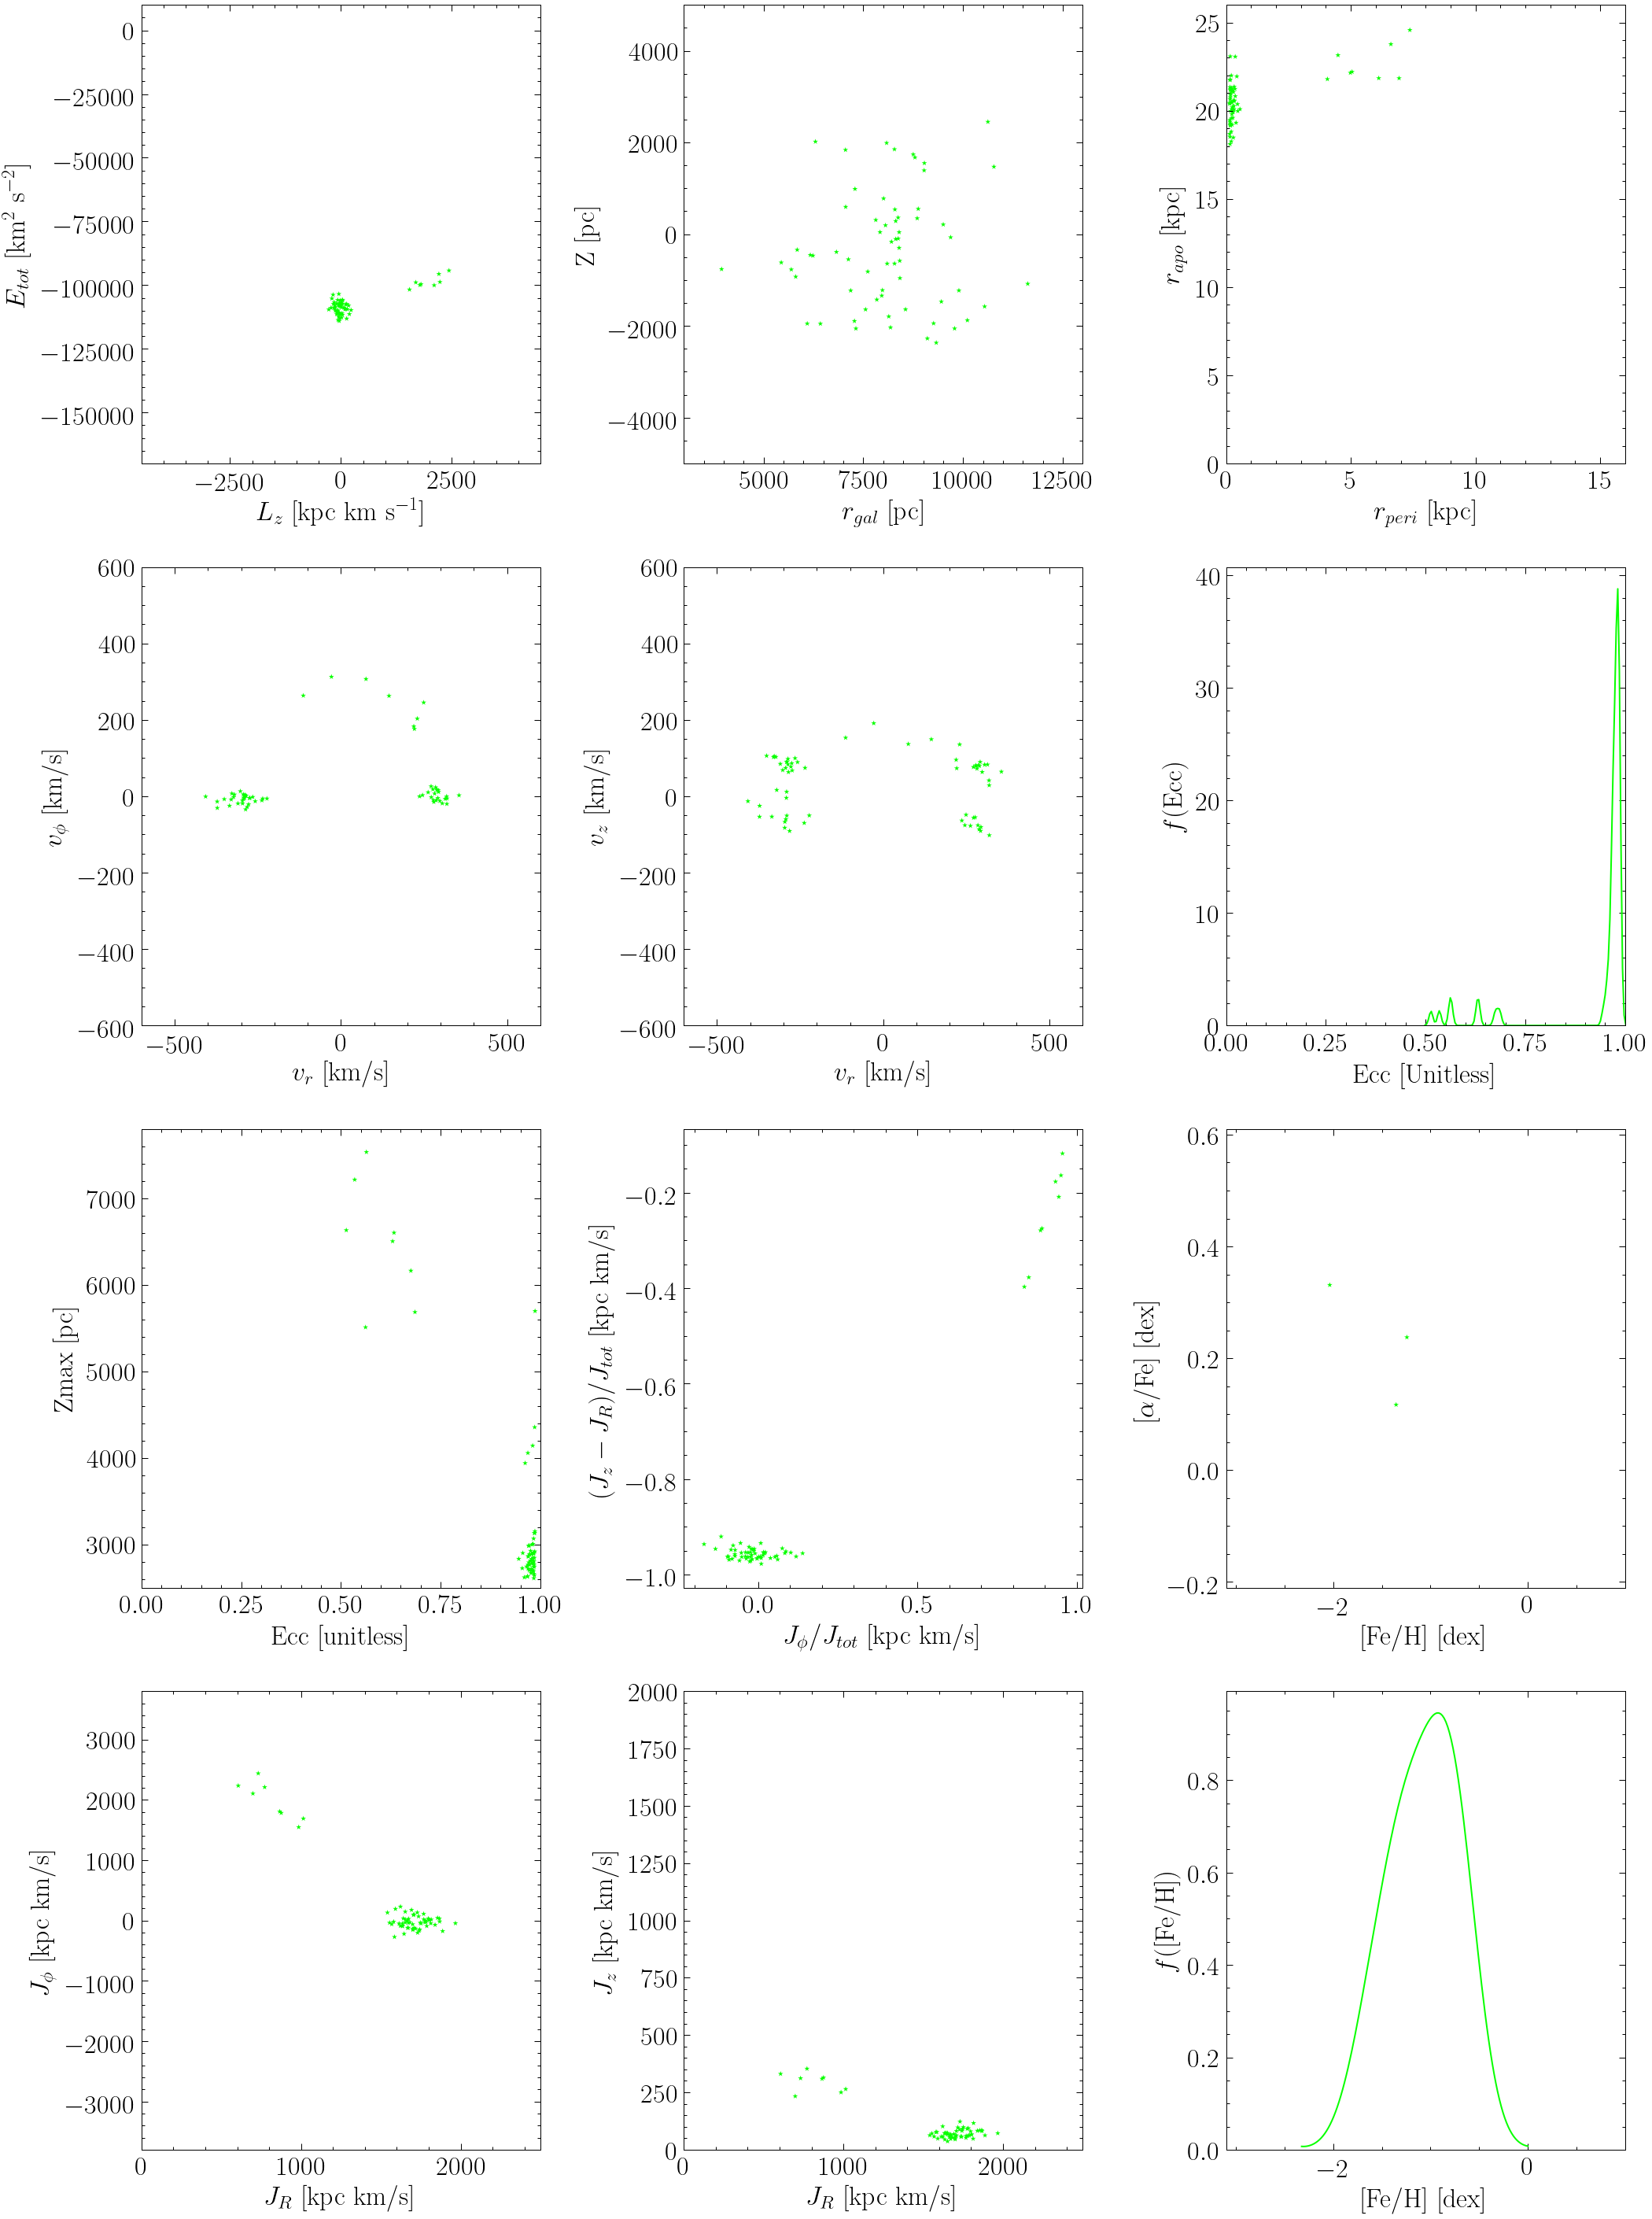

In [92]:
# Plot individual clusters for closer examination
i = 1


# Apply the non-GC cut if needed
# ind_tmp = clust_all_ind[i]
# col_tmp = clust_all_col[i]

# plot_summary_v3(cm_vel_all,orb_param_all,ind_list=[ind_tmp],c_list=[col_tmp],
#                 title='',legends=[''],list_mask=False,ind_add_cut=[],ds=False,noise=False,
#                 filename=None)

ind_tmp = np.intersect1d(ind_tmp,np.arange(len(cm_vel_all))[~gc3201])
col_tmp = col_tmp[:len(ind_tmp)]

# print(orb_param_all.loc[ind_tmp,'ecc'].values)
# print(orb_param_all.loc[ind_tmp,'zmax'].values)
# print(orb_param_all.loc[ind_tmp[14],'ecc'], orb_param_all.loc[ind_tmp[14],'zmax'])

plot_summary_v3(cm_vel_all,orb_param_all,ind_list=[ind_tmp],c_list=[col_tmp],
                title='',legends=[''],list_mask=False,ind_add_cut=[],ds=False,noise=False,
                filename=f'{data_dir}plot_node_merging{extratext}_sequoia_ngc_removed.pdf')

In [129]:
clust_all_col[i][0]

array([3.12493437e-02, 1.00000000e+00, 1.31250131e-06, 1.00000000e+00])